In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def ucb1(T, delta, is_modified):
    num_arms = 2
    counts = np.zeros(num_arms)  # Number of times each arm is played
    values = np.zeros(num_arms)  # Total reward for each arm
    regrets = []

    # E[r_t,a*] and E[r_t,a]
    true_rewards = [0.5 + delta / 2, 0.5 - delta / 2]

    for t in range(1, T + 1):
        if t <= num_arms:
            # Play each arm once
            arm = t - 1
        else:
            # Play the arm with the highest UCB
            ucb_values = values / counts
            if is_modified:
                confidence_bounds = np.sqrt(np.log2(t**2) / (2 * counts))
            else:
                confidence_bounds = np.sqrt(np.log2(t**3) / (2 * counts))
            ucb_values += confidence_bounds
            arm = np.argmax(ucb_values)

        # Simulate the reward using Bernoulli distribution
        reward = np.random.binomial(1, true_rewards[arm])
        counts[arm] += 1
        values[arm] += reward

        # Calculate regret
        best_possible_reward = max(true_rewards)
        regret = best_possible_reward - true_rewards[arm]
        regrets.append(regret)

    cumulative_regret = np.cumsum(regrets)
    return cumulative_regret

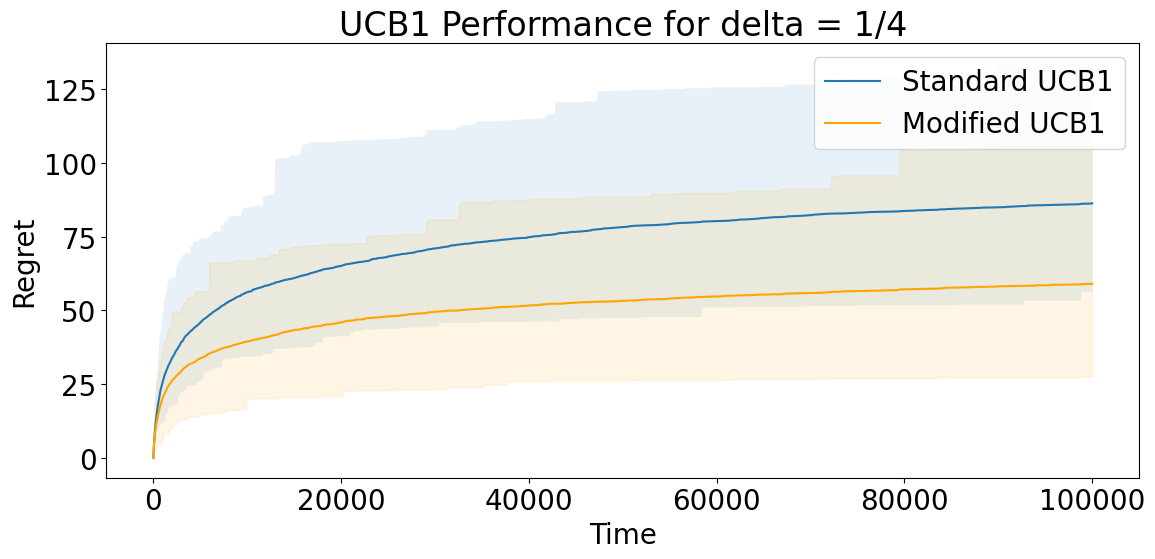

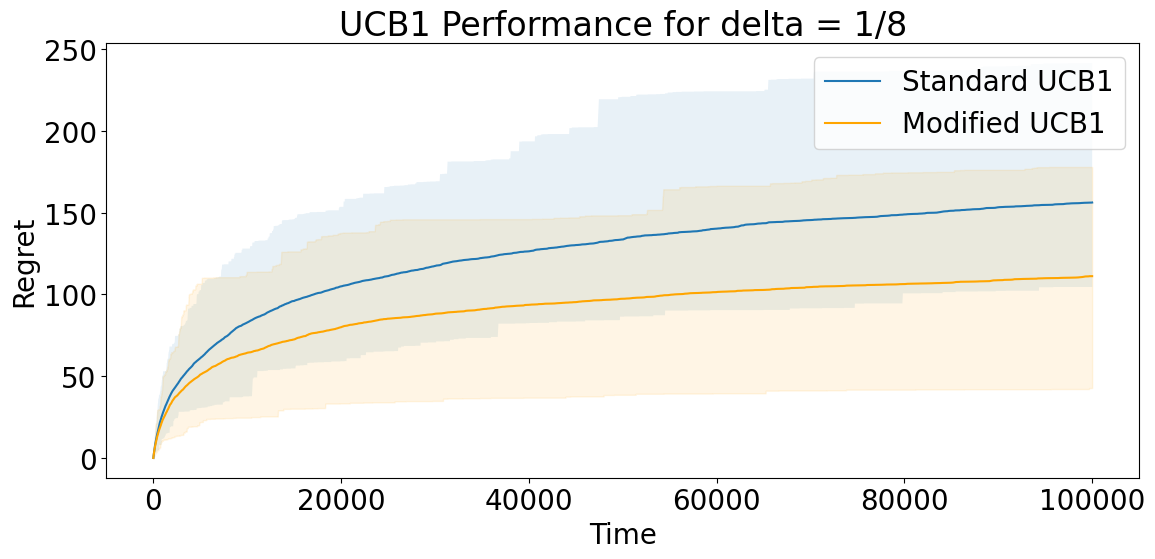

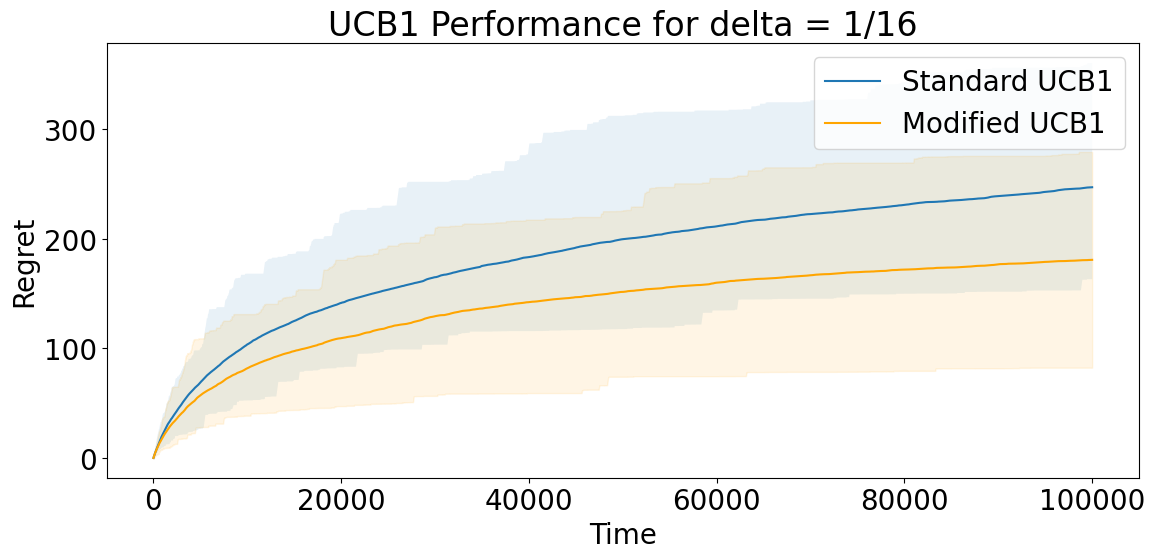

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20})

# Parameters
T = 100000  # Total number of time steps
num_simulations = 20  # Number of simulations to run
deltas = [1/4, 1/8, 1/16]  # Different values of delta

# Store simulation results
results_standard = {delta: [] for delta in deltas}
results_modified = {delta: [] for delta in deltas}

# Run simulations
for delta in deltas:
    for _ in range(num_simulations):
        results_standard[delta].append(ucb1(T, delta, is_modified=False))
        results_modified[delta].append(ucb1(T, delta, is_modified=True))

# Plotting results
for delta in deltas:
    plt.figure(figsize=(12, 6))

    # Calculate mean, min, max for standard UCB1
    regrets_standard = np.array(results_standard[delta])
    mean_standard = regrets_standard.mean(axis=0)
    min_standard = regrets_standard.min(axis=0)
    max_standard = regrets_standard.max(axis=0)

    # Calculate mean, min, max for modified UCB1
    regrets_modified = np.array(results_modified[delta])
    mean_modified = regrets_modified.mean(axis=0)
    min_modified = regrets_modified.min(axis=0)
    max_modified = regrets_modified.max(axis=0)

    # Time steps
    time_steps = np.arange(T)

    # Plot standard UCB1
    plt.plot(time_steps, mean_standard, label='Standard UCB1')
    plt.fill_between(time_steps, min_standard, max_standard, alpha=0.1)

    # Plot modified UCB1
    plt.plot(time_steps, mean_modified, label='Modified UCB1', color='orange')
    plt.fill_between(time_steps, min_modified, max_modified, color='orange', alpha=0.1)

    # Labels and title
    plt.xlabel('Time')
    plt.ylabel('Regret')
    plt.title(f'UCB1 Performance for delta = 1/{int(1/delta)}')
    plt.legend()
    # Make it tight
    plt.tight_layout()
    # Make font size larger
    plt.savefig(f'ucb1_performance_{delta}.png')
    plt.show()